# Análisis de precios de viviendas en California

## Objetivo
Explorar y analizar qué factores influyen en el precio de las casas en California,
utilizando técnicas de análisis exploratorio de datos y visualización.

## Dataset
California Housing Dataset

## Descripción del dataset

1. **longitude**: Medida de qué tan al oeste se encuentra una vivienda;
   un valor más alto indica que está más hacia el oeste.

2. **latitude**: Medida de qué tan al norte se encuentra una vivienda;
   un valor más alto indica que está más al norte.

3. **housingMedianAge**: Edad mediana de las viviendas dentro de un bloque;
   un valor más bajo indica construcciones más nuevas.

4. **totalRooms**: Número total de habitaciones dentro de un bloque.

5. **totalBedrooms**: Número total de dormitorios dentro de un bloque.

6. **population**: Número total de personas que residen en un bloque.

7. **households**: Número total de hogares en un bloque.

8. **medianIncome**: Ingreso mediano de los hogares dentro de un bloque,
   medido en decenas de miles de dólares estadounidenses.

9. **medianHouseValue** (variable objetivo): Valor mediano de las viviendas dentro de un bloque,
   medido en dólares estadounidenses.

10. **oceanProximity**: Ubicación de la vivienda con respecto al océano o al mar.

## Hipotesis iniciales

1. Las viviendas ubicadas más cerca del océano presentan precios más elevados
   que aquellas ubicadas tierra adentro.

2. Zonas con mayor ingreso medio de los hogares tienden a tener viviendas
   con precios más altos.

3. La edad de las viviendas influye en su precio; las viviendas más nuevas
   podrían ser más costosas debido a mejores materiales y servicios.

4. El tamaño de las viviendas, medido a través del número total de habitaciones
   y dormitorios, influye positivamente en el precio de las casas.

5. La densidad poblacional de un bloque, medida a través de la población y la
   cantidad de hogares, puede influir en el precio de las viviendas, dependiendo
   de la ubicación y del nivel de ingresos de la zona.

Un block (bloque censal) es una unidad geográfica usada para agrupar datos. Puede incluir varias viviendas, varias calles, una zona pequeña y relativamente homogénea.




In [21]:
import pandas as pd # trabajar con datasets
import numpy as np # calculo
import matplotlib.pyplot as plt # graficos
import seaborn as sns # plus de matlotlib

## Carga del dataset housing.csv y verificacion de errores

In [22]:
df = pd.read_csv("../data/raw/housing.csv")
df.head() #visualizar las primeras filas del dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [23]:
# Ultimos valores
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


## Exploracion del Dataset

In [24]:
# info general del dataset, cantidad de datos(RangeIndex), columnas, tipos de datos, valores faltantes
df.info()
# object casi siempre significa texto.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [26]:
# estadisticas: valores minimos, maximos, no nulos(count), promedio(mean), desviacion estandar(std), cuartiles
df.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [27]:
# valores únicos de la variable categórica 
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

## Observaciones iniciales

El dataset contiene 20.640 registros y 10 variables. La mayoría de las variables son numéricas, mientras que `ocean_proximity` es una variable categórica que representa la ubicación respecto al océano.

Se identifican valores faltantes en la variable `total_bedrooms`, los cuales serán tratados en la etapa de limpieza de datos.
 
Las estadísticas descriptivas muestran una alta variabilidad en los precios de las viviendas, lo que indica que existen zonas más costosas y otras más económicas. Esto sugiere que el precio de una casa no depende de un solo factor, sino de la combinación de distintas características como la ubicación, el nivel de ingresos y la cantidad de viviendas o personas en cada zona.

La desviación estándar elevada en variables como `total_rooms`, `population` y `households` indica una gran diferencia entre los bloques, lo cual sugiere que estas variables podrían influir en el precio de las viviendas en combinación con factores como la ubicacion geografica o niveles de ingreso economico.

## Analisis exploratorio de la relación entre el precio de las viviendas.

Este analisis permite identificar que variables muestran mayor influencia con el precio.

Variables clave: ocean_proximity, median_age, media_income, total_rooms y population, esto debido a que una casa mas nueva, con mas habitaciones, en un bloque con mas residencia, con mayor rango de ingreso podria estar relacionado a nuestro objetivo.

## Histograma del precio de las viviendas

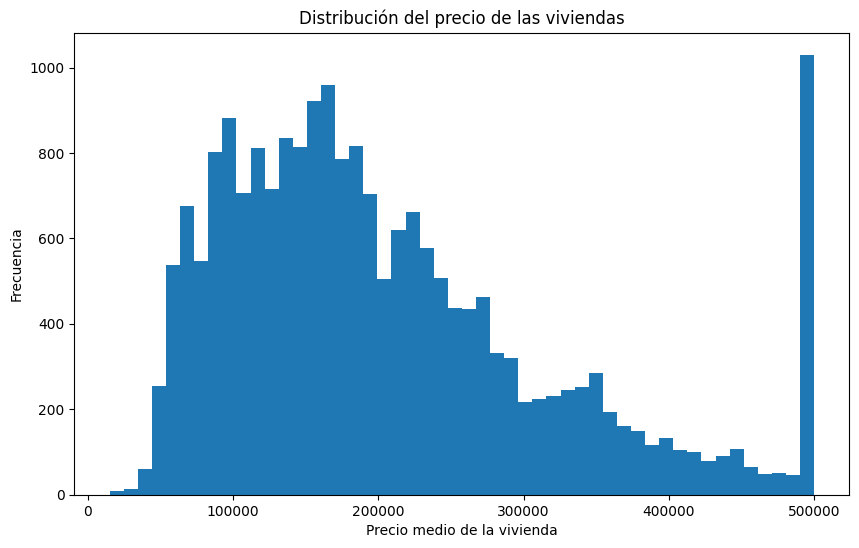

In [28]:
plt.figure(figsize=(10, 6)) # tamano del grafico ancho y largo 
plt.hist(
    df["median_house_value"],
    bins=50
)# crea el histograma del dataset en contenedores de 50

plt.title("Distribución del precio de las viviendas")
plt.xlabel("Precio medio de la vivienda")
plt.ylabel("Frecuencia")

plt.show()# muestra el grafico

En este grafico podemos observar que las viviendas con un costo de entre proximadamente 100.000 y 250.000 dolares tienen frecuencias mas altas.
Se observa una acumulación de valores en el límite superior del precio (500.000 USD). Esto sugiere que el conjunto de datos presenta un tope en el valor máximo registrado, lo que provoca que varias viviendas de alto precio aparezcan con el mismo valor. 
Con esto podemos demostrar asi una distribucion dispareja, osea que el precio de las viviendas varia mucho entre ellas debido a varios factores.
A medida que el precio aumenta, la cantidad de viviendas disminuye, lo que indica una distribución desigual del precio de las casas.

## Heatmap

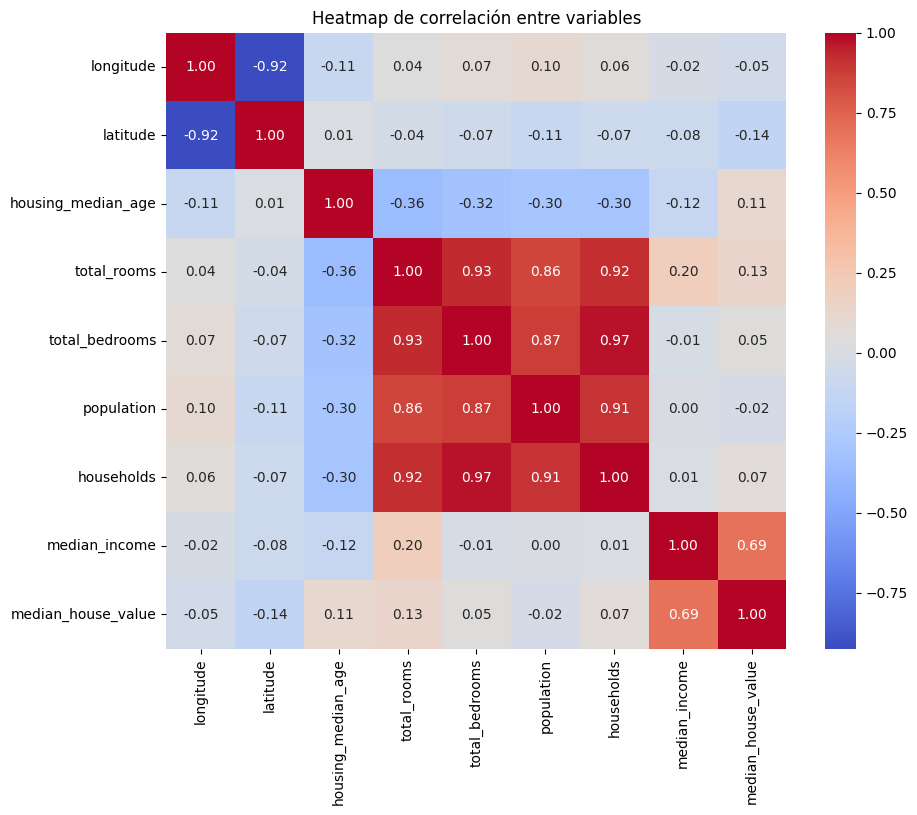

In [16]:
# Seleccionamos solo columnas numéricas
df_numeric = df.select_dtypes(include=["float64"])

# Calculamos la correlación
corr = df_numeric.corr()

# Creamos el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,        # muestra los valores numéricos
    cmap="coolwarm",   # colores: rojo (+), azul (-)
    fmt=".2f"          # dos decimales
)

plt.title("Heatmap de correlación entre variables")
plt.show()


El mapa de calor permite identificar rápidamente que el ingreso medio es la variable con mayor correlación con el precio de las viviendas, sin embargo para comprender la distribución de los datos, detectar valores atípicos, analizar variables categóricas y confirmar visualmente la ausencia de relaciones claras en otras variables realizaremos un analisis visual mas detallado.

## Precio de las viviendas segun su cercania al oceano 

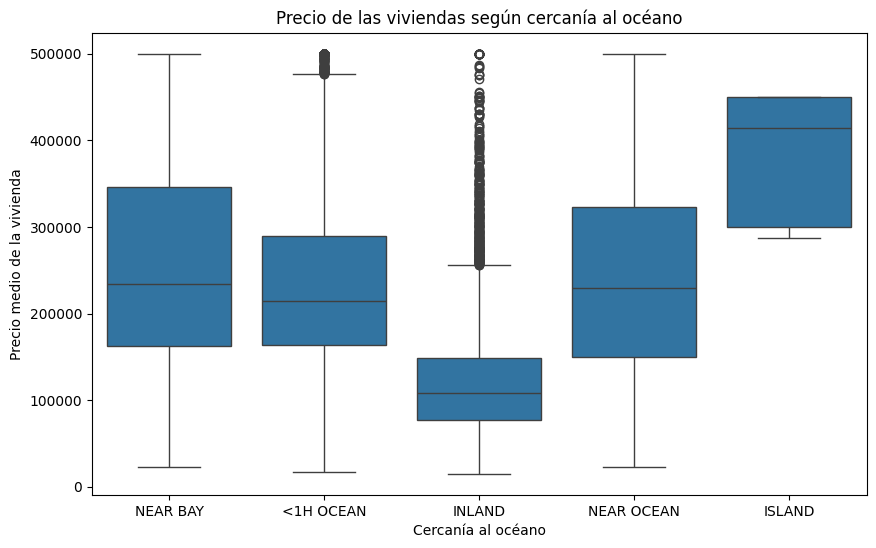

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="ocean_proximity",
    y="median_house_value",
    data=df
)

plt.title("Precio de las viviendas según cercanía al océano")
plt.xlabel("Cercanía al océano")
plt.ylabel("Precio medio de la vivienda")

plt.show()

Este bloxplot nos muestra que las casas en "island" tienen un costo mas elevado mientras que las viviendas ubicadas en zonas INLAND tienden a ser más económicas., eso si existen algunas casas a una hora del oceano y en tierra que se alejan bastante del promedio. También se observan valores atípicos(outliers) en las categorías <1H OCEAN e INLAND, lo que indica la existencia de algunas viviendas con precios considerablemente más altos que el promedio, a pesar de no estar tan cerca del océano.

## Precio de las viviendas segun el ingreso medio de cada bloque

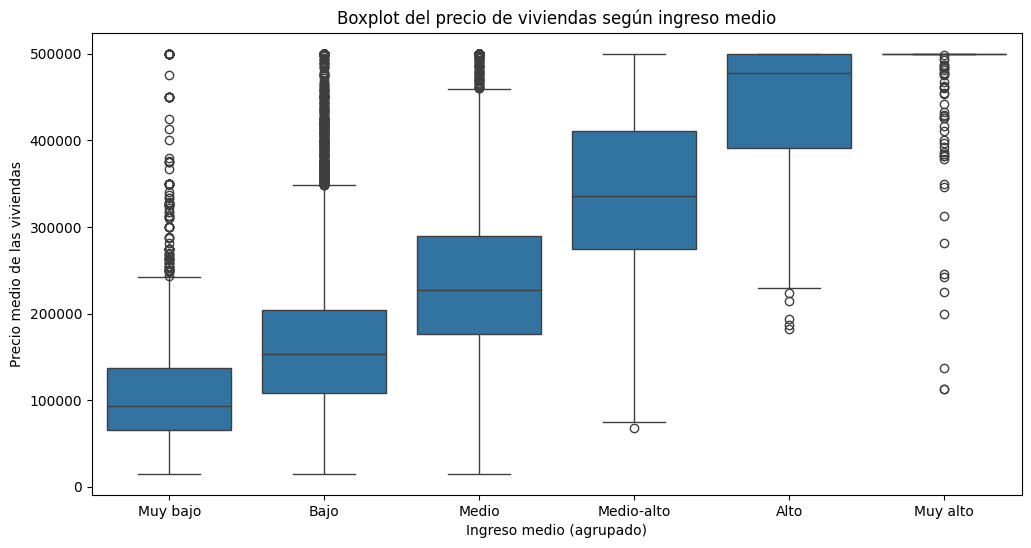

In [16]:
# Crear rangos de ingreso medio
df["income_group"] = pd.cut(
    df["median_income"],
    bins=[0, 2, 4, 6, 8, 10, 15],
    labels=["Muy bajo", "Bajo", "Medio", "Medio-alto", "Alto", "Muy alto"]
)

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(
    x="income_group",
    y="median_house_value",
    data=df
)

plt.title("Boxplot del precio de viviendas según ingreso medio")
plt.xlabel("Ingreso medio (agrupado)")
plt.ylabel("Precio medio de las viviendas")
plt.show()


En este grafico, se observa que la mediana del precio de las viviendas aumenta a medida que crece el ingreso medio, lo que indica que las personas con ingresos bajos tienden a adquirir viviendas de menor valor, mientras que aquellas con mayores ingresos acceden a viviendas más costosas.
Estos resultados permiten concluir que existe una relación directa entre el ingreso económico y el valor medio de la vivienda: a mayor ingreso, mayor es el precio de las casas.

## Precio vs Edad Media de las Casas de un bloque

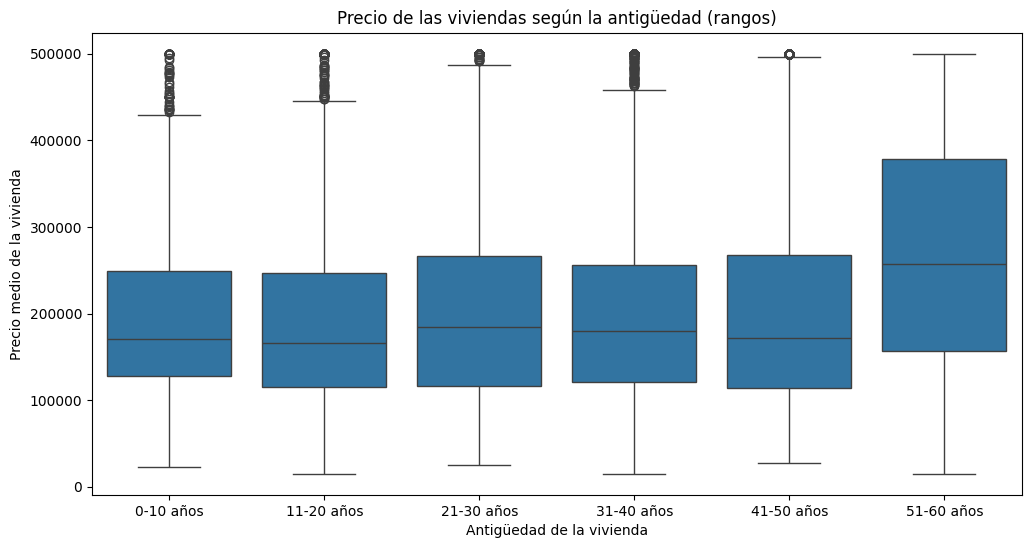

In [17]:
# Crear rangos de edad de las viviendas
df["age_group"] = pd.cut(
    df["housing_median_age"],
    bins=[0, 10, 20, 30, 40, 50, 60],
    labels=[
        "0-10 años",
        "11-20 años",
        "21-30 años",
        "31-40 años",
        "41-50 años",
        "51-60 años"
    ]
)

plt.figure(figsize=(12, 6))
sns.boxplot(
    x="age_group",
    y="median_house_value",
    data=df
)

plt.title("Precio de las viviendas según la antigüedad (rangos)")
plt.xlabel("Antigüedad de la vivienda")
plt.ylabel("Precio medio de la vivienda")
plt.show()

Con este bloxplot podemos deducir que la edad no influye mucho en el precio de las viviendas, ya que un bloque de casas de 10 añoso menor se mantiene en el mismo rango de precio promedio que una de aproximadamente 50 años. 
Ademas, se encontraron outliers en ben distintos rangos de antigüedad, que podrian tener relacion con otros factores para determinar su valor por encima del maximo

## Scatter plot: Precio vs Tamaño de la vivienda

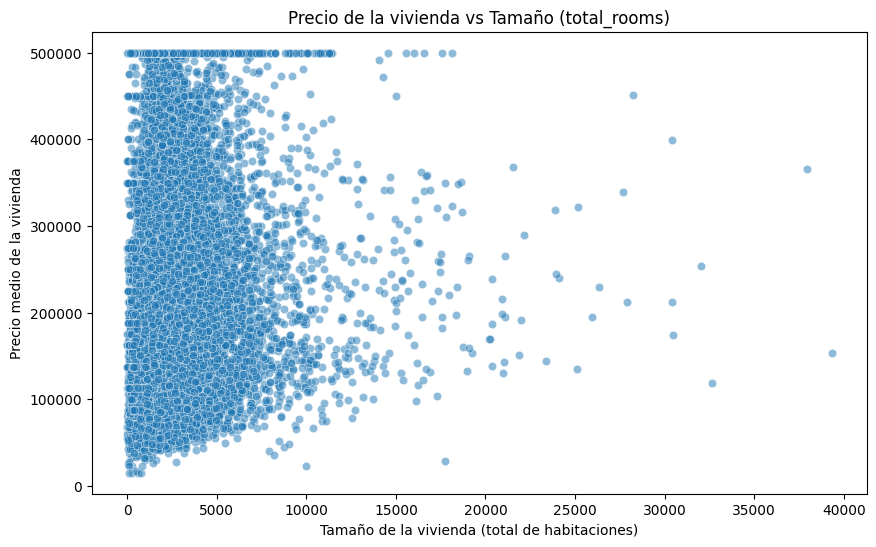

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="total_rooms",
    y="median_house_value",
    data=df,
    alpha=0.5
)

plt.title("Precio de la vivienda vs Tamaño (total_rooms)")
plt.xlabel("Tamaño de la vivienda (total de habitaciones)")
plt.ylabel("Precio medio de la vivienda")
plt.show()


El tamaño de la vivienda, medido por total_rooms, no muestra una relación fuerte ni directa con el precio de las casas. Viviendas de tamaños similares pueden tener precios muy distintos, lo que indica que el tamaño por sí solo no es un buen predictor del valor de la vivienda.

## Precio vs Poblacion

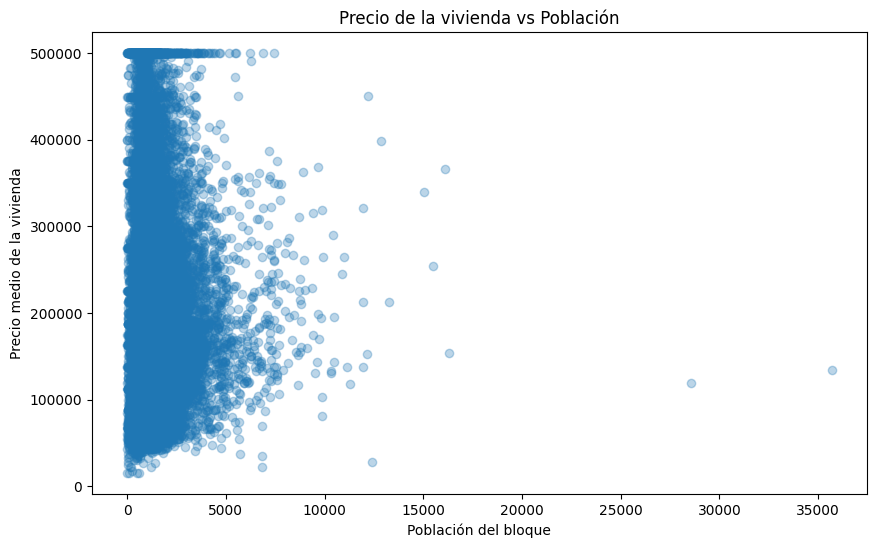

In [11]:
plt.figure(figsize=(10, 6))

plt.scatter(
    df["population"],
    df["median_house_value"],
    alpha=0.3  # transparencia para ver mejor la densidad
)

plt.xlabel("Población del bloque")
plt.ylabel("Precio medio de la vivienda")
plt.title("Precio de la vivienda vs Población")

plt.show()


La cantidad de personas residentes en un bloque no parece influir significativamente en el precio de las viviendas. Al igual que con el tamaño, el precio se ve afectado por otros factores más determinantes.

## Conclusion del EDA 

El análisis exploratorio muestra que el ingreso medio (median_income) presenta la relación más fuerte con el precio de las viviendas, mientras que la cercanía al océano (ocean_proximity) también influye significativamente, con precios más altos en zonas costeras. Otras variables como el tamaño de la vivienda, la población o la edad de las casas no muestran una relación clara con el precio cuando se analizan de forma individual.

## Limpieza de datos.

Dejar el dataset en condiciones de ser usado para análisis más avanzados sin perder información relevante ni introducir sesgos innecesarios.

In [20]:
# valores faltantes

df.isnull().sum()


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

La variable total_bedrooms cuenta con 207 valores nulos, los cuales ya habiamos visto en la exploracion del dataset. Se opto por rellenarlos con la mediana como valor representativo debido a que exista mucha dispersion en el promedio. No se eliminaron registros para evitar la pérdida de información.

In [13]:
df["total_bedrooms"].fillna(df["total_bedrooms"].median(), inplace=True)

C:\Users\Jazmin\AppData\Local\Temp\ipykernel_9180\2164095440.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["total_bedrooms"].fillna(df["total_bedrooms"].median(), inplace=True)


In [19]:
df.isnull().sum()


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [62]:
# tipos de datos

df.dtypes

longitude                float64
latitude                 float64
housing_median_age       float64
total_rooms              float64
total_bedrooms           float64
population               float64
households               float64
median_income            float64
median_house_value       float64
ocean_proximity           object
persons_per_household    float64
rooms_per_household      float64
dtype: object

Los tipos de datos fueron revisados y se confirmó que las variables numéricas y categóricas se encuentran correctamente definidas.

# Creacion de nuevas variables.

Con el objetivo de obtener una representación más significativa de las características de las viviendas se incorporaron variables de las variables originales como la cantidad de personas por hogar, habitaciones por vivienda, y precio por habitacion. Estas transformaciones permiten capturar mejor la densidad poblacional, el tamaño relativo de las viviendas y una medida más ajustada del valor de las propiedades.

* persons_per_household: indica la cantidad promedio de personas que viven en cada hogar, permitiendo analizar posibles situaciones de hacinamiento.

* rooms_per_household: representa el número promedio de habitaciones por vivienda, lo que aporta información sobre el tamaño relativo de las casas.

In [ ]:
df["persons_per_household"] = df["population"] / df["households"]
df["rooms_per_household"] = df["total_rooms"] / df["households"]

In [58]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,persons_per_household,rooms_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,3.070655,5.429000
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,10.386050,2.474173
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.692308,0.846154
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,2.429741,4.440716
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,2.818116,5.229129
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,3.282261,6.052381
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1243.333333,141.909091


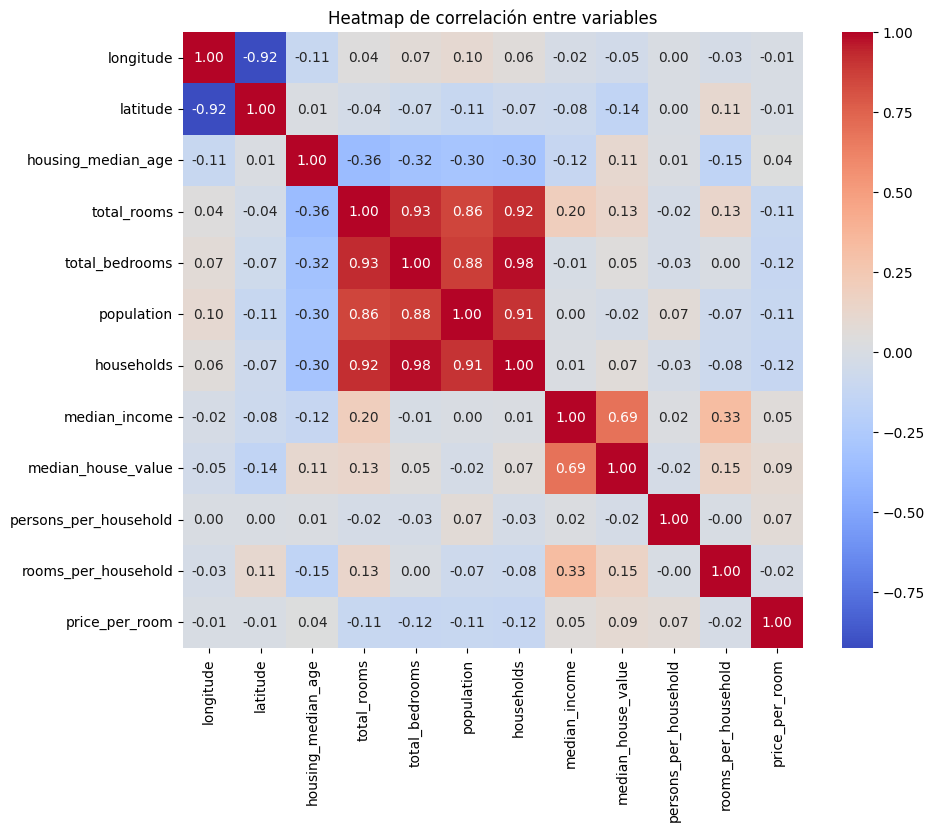

In [32]:
# Seleccionamos solo columnas numéricas
df_numeric = df.select_dtypes(include=["float64"])

# Calculamos la correlación
corr = df_numeric.corr()

# Creamos el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,        # muestra los valores numéricos
    cmap="coolwarm",   # colores: rojo (+), azul (-)
    fmt=".2f"          # dos decimales
)

plt.title("Heatmap de correlación entre variables")
plt.show()


La nueva variables habitaciones por casa tendria una leve relacion con el precio de las viviendas, mas no es asi con las demas creadas recientemente.

## Precio vs Personas por hogar

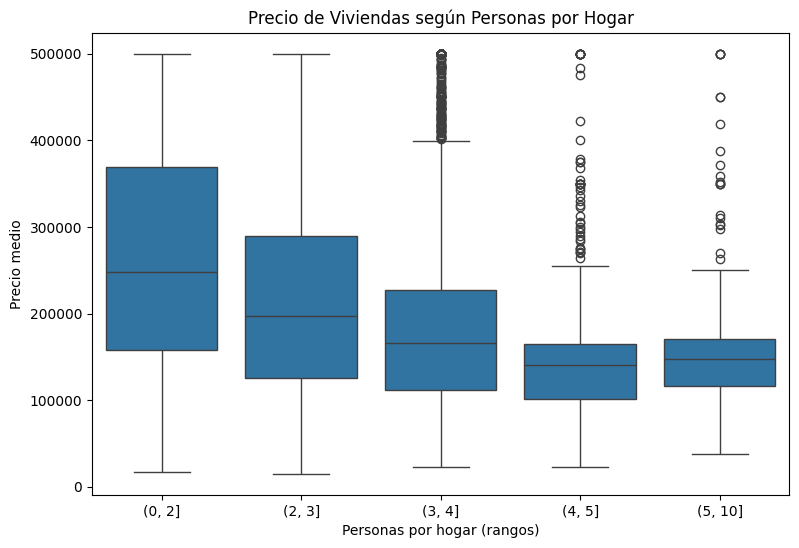

In [41]:
df["persons_range"] = pd.cut(
    df["persons_per_household"],
    bins=[0, 2, 3, 4, 5, 10]
)

plt.figure(figsize=(9,6))
sns.boxplot(
    x="persons_range",
    y="median_house_value",
    data=df
)
plt.title("Precio de Viviendas según Personas por Hogar")
plt.xlabel("Personas por hogar (rangos)")
plt.ylabel("Precio medio")
plt.show()


In [ ]:
df["persons_range"].isna().sum()

np.int64(37)

Se observa el aumento del precio en viviendas con menor cantidad de personas residentes.

## Precio vs habitaciones por hogar

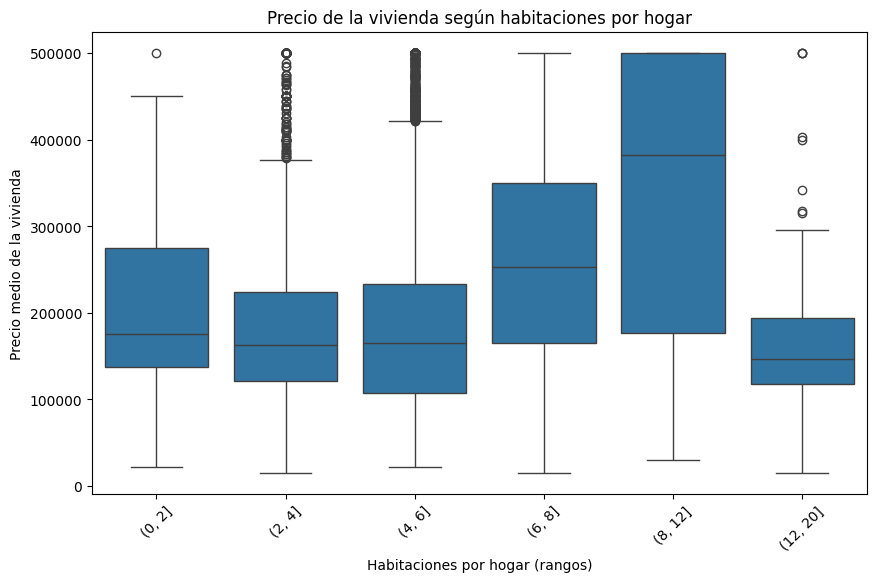

In [48]:
df["rooms_per_household_round"] = df["rooms_per_household"].round(1)

df["rooms_range"] = pd.cut(
    df["rooms_per_household_round"],
    bins=[0, 2, 4, 6, 8, 12, 20]
)


plt.figure(figsize=(10, 6))
sns.boxplot(
    x="rooms_range",
    y="median_house_value",
    data=df
)

plt.xlabel("Habitaciones por hogar (rangos)")
plt.ylabel("Precio medio de la vivienda")
plt.title("Precio de la vivienda según habitaciones por hogar")
plt.xticks(rotation=45)
plt.show()


Se observa una relación positiva entre la cantidad de habitaciones por hogar y el precio medio de la vivienda. Sin embargo, el rango de 12 a 20 habitaciones presenta una desviación de esta tendencia, lo cual podría estar asociado a viviendas compartidas, donde un mayor número de habitaciones no necesariamente implica mayor valor inmobiliario.

## Conclusion del analisis

El análisis sugiere que las zonas con menor densidad poblacional y con viviendas de mayor tamaño tienden a presentar precios más altos. Esto podría indicar que hogares con mayores ingresos económicos suelen habitar casas más grandes, lo cual influye indirectamente en el valor de la vivienda.